In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_excel("/kaggle/input/ubmec-data/UBMEC.xlsx")

In [3]:
df_train.head()

,text,classes
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise


In [4]:
df_train.dropna(inplace=True)

In [5]:
df_train.dtypes

text       object
classes    object
dtype: object

In [6]:
# Change data type of 'Column1' to string
df_train['text'] = df_train['text'].astype(str)

In [7]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3648


In [8]:
df_train['classes'].value_counts()

classes
joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [10]:
X_train  =  train_df['text'].values.tolist()
y_train = train_df['classes'].tolist()

In [11]:
X_test =  test_df['text'].values.tolist()
y_test = test_df['classes'].tolist()

In [12]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.3 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=5f4aa0321214bf02d628c5c790013994632e543b654ae5d37d344bca5efc2a13
  Stored in directory: /roo

In [13]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [14]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 19
	95percentile : 42
	99percentile : 75


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 19
	95percentile : 45
	99percentile : 78


In [15]:
print(trn)

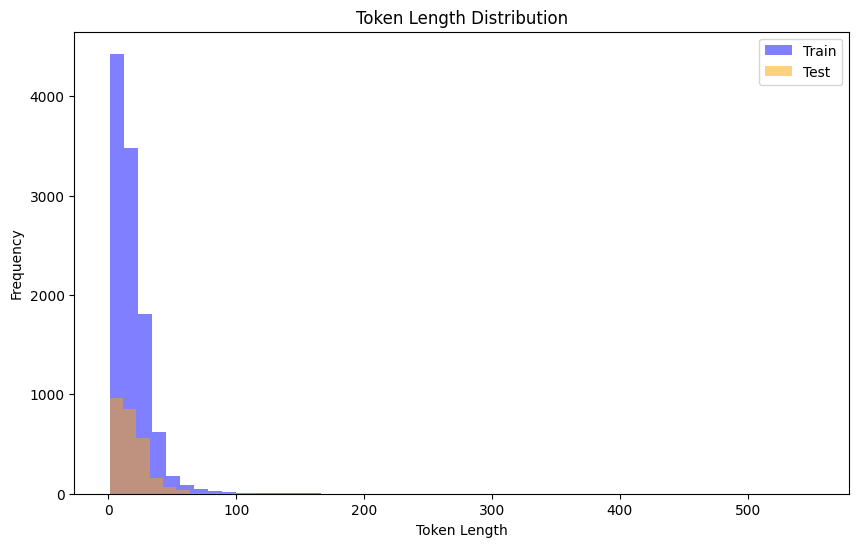

In [16]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [17]:
model = t.get_classifier()

In [18]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [19]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [20]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1344/1344 [==============================] - 855s 617ms/step - loss: 1.5552 - accuracy: 0.3687 - val_loss: 1.3606 - val_accuracy: 0.4818
Epoch 2/10
1344/1344 [==============================] - 824s 613ms/step - loss: 1.3034 - accuracy: 0.5071 - val_loss: 1.2961 - val_accuracy: 0.5067
Epoch 3/10
1344/1344 [==============================] - 824s 613ms/step - loss: 1.1367 - accuracy: 0.5753 - val_loss: 1.2815 - val_accuracy: 0.5238
Epoch 4/10
1344/1344 [==============================] - 824s 613ms/step - loss: 1.0090 - accuracy: 0.6301 - val_loss: 1.2810 - val_accuracy: 0.5413
Epoch 5/10
1344/1344 [==============================] - 824s 613ms/step - loss: 0.8845 - accuracy: 0.6746 - val_loss: 1.3115 - val_accuracy: 0.5372
Epoch 6/10
1344/1344 [==============================] - 824s 613ms/step - loss: 0.7163 - accuracy: 0.7373 - val_loss: 1.4515 - val_accuracy: 0.5342
Epoch 7/10
1344/1344 [===========================

In [21]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [22]:
classes=t.get_classes()

In [23]:
cm = learner.validate(class_names=t.get_classes())

84/84 [==============================] - 60s 678ms/step
              precision    recall  f1-score   support

       anger       0.58      0.54      0.56       496
     disgust       0.39      0.40      0.39       416
        fear       0.59      0.60      0.60       272
         joy       0.74      0.73      0.73       694
     sadness       0.50      0.52      0.51       537
    surprise       0.43      0.44      0.43       273

    accuracy                           0.56      2688
   macro avg       0.54      0.54      0.54      2688
weighted avg       0.56      0.56      0.56      2688



In [24]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [25]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)
